In [98]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('../ml/data/basketball.csv', encoding='utf-8')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [100]:
# Player : 이름
# Pos: 플레이어의 포지션을 나타냅니다. 'SG' 는 '슈팅가드' 'C'는 '센터'를 의미
# 3P : 3점슛 성공 횟수
# 2P : 2점슛 성공 횟수
# TRB: 리바운드 성공 횟수
# AST: 어시스트 성공 횟수
# STL: 스틸 성공 횟수
# BLK: 블로킹 성공 횟수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [101]:
df.corr()

,3P,2P,TRB,AST,STL,BLK
3P,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588
2P,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056
TRB,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542
AST,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161
STL,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208
BLK,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000


In [102]:
# 슈팅가드 : 골대 멀리서 공격하는 장거리슛 능력을 가진 선수로 3점슛(3P) 비중이 높을 것
# 센터 : 주로 골 밑에서 수비를 위주로 하기 때문에 리바운드(TRB) 비중이 높을 것

In [103]:
df['Pos'] = df['Pos'].apply(lambda x : 1 if x == 'C' else 0)
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,0,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,1,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,1,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,1,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,0,1.5,3.5,4.3,3.4,0.8,0.5


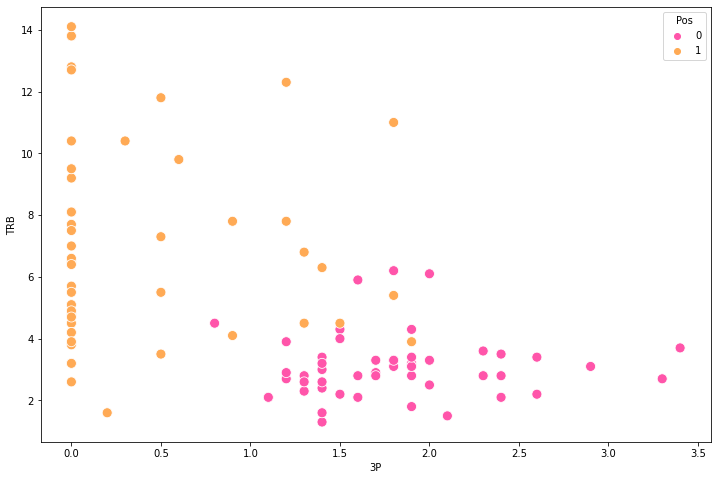

In [130]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='3P', y='TRB', hue='Pos', s=100, palette='spring')
plt.show()

In [105]:
# 이름이 포지션에 영향을 주지 않을 것으로 판단해 제외하고 처리
X = df.iloc[:, 2:]
y = df['Pos']

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 6)
(20, 6)
(80,)
(20,)


In [108]:
for x in [3,5,9,11,15]:
    clf = KNeighborsClassifier(n_neighbors=x)
    clf.fit(X_train, y_train)
    print(f'n_neighbors가 {x} 일 때 train set accuracy : {clf.score(X_train, y_train)}')
    print(f'n_neighbors가 {x} 일 때 test set accuracy : {clf.score(X_test, y_test)}')

n_neighbors가 3 일 때 train set accuracy : 0.9625
n_neighbors가 3 일 때 test set accuracy : 1.0
n_neighbors가 5 일 때 train set accuracy : 0.95
n_neighbors가 5 일 때 test set accuracy : 1.0
n_neighbors가 9 일 때 train set accuracy : 0.9375
n_neighbors가 9 일 때 test set accuracy : 0.95
n_neighbors가 11 일 때 train set accuracy : 0.9125
n_neighbors가 11 일 때 test set accuracy : 1.0
n_neighbors가 15 일 때 train set accuracy : 0.925
n_neighbors가 15 일 때 test set accuracy : 0.95


In [109]:
# 3->5->9로 parameter 테스트 시 점차 정확도가 떨어지기 때문에 n_neighbors = 3으로 설정
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
real_lable = y_test
predict_label = clf.predict(X_test)

In [111]:
label_df = pd.DataFrame({'실제값':real_lable, '예측값':predict_label})
label_df.reset_index(drop=True, inplace=True)
label_df.head()

,실제값,예측값
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1


In [112]:
label_df['예측성공여부'] = label_df['실제값'] == label_df['예측값']
label_df

,실제값,예측값,예측성공여부
0,1,1,True
1,1,1,True
2,0,0,True
3,0,0,True
4,1,1,True
5,0,0,True
6,0,0,True
7,0,0,True
8,1,1,True
9,0,0,True


array([[<AxesSubplot:xlabel='Pos', ylabel='Pos'>,
        <AxesSubplot:xlabel='3P', ylabel='Pos'>,
        <AxesSubplot:xlabel='2P', ylabel='Pos'>,
        <AxesSubplot:xlabel='TRB', ylabel='Pos'>,
        <AxesSubplot:xlabel='AST', ylabel='Pos'>,
        <AxesSubplot:xlabel='STL', ylabel='Pos'>,
        <AxesSubplot:xlabel='BLK', ylabel='Pos'>],
       [<AxesSubplot:xlabel='Pos', ylabel='3P'>,
        <AxesSubplot:xlabel='3P', ylabel='3P'>,
        <AxesSubplot:xlabel='2P', ylabel='3P'>,
        <AxesSubplot:xlabel='TRB', ylabel='3P'>,
        <AxesSubplot:xlabel='AST', ylabel='3P'>,
        <AxesSubplot:xlabel='STL', ylabel='3P'>,
        <AxesSubplot:xlabel='BLK', ylabel='3P'>],
       [<AxesSubplot:xlabel='Pos', ylabel='2P'>,
        <AxesSubplot:xlabel='3P', ylabel='2P'>,
        <AxesSubplot:xlabel='2P', ylabel='2P'>,
        <AxesSubplot:xlabel='TRB', ylabel='2P'>,
        <AxesSubplot:xlabel='AST', ylabel='2P'>,
        <AxesSubplot:xlabel='STL', ylabel='2P'>,
        <AxesSubp

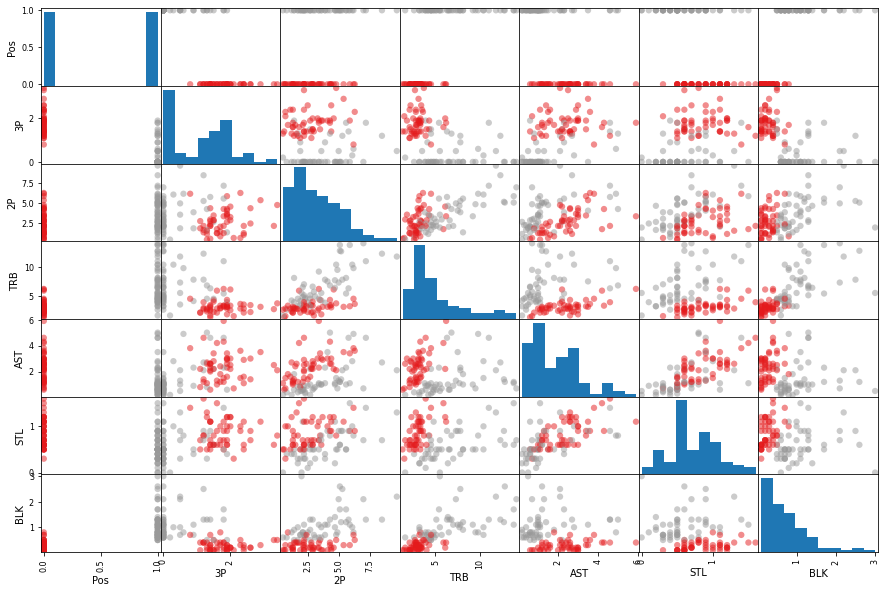

In [117]:
# s = 사이즈, alpha : 투명도, marker : 점 모양(default '.')
scatter_matrix(df, figsize=(15,10), s=40, alpha=0.5, marker='o', cmap='Set1', c=df['Pos'])